Install SimpleElastix and SimpleITK python module by the original tutorial  
https://simpleelastix.readthedocs.io/GettingStarted.html

In [3]:
#import necessary packages
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.io import imread, imsave
from skimage.filters import threshold_li
from skimage import img_as_ubyte

(-0.5, 6479.5, 4546.5, -0.5)

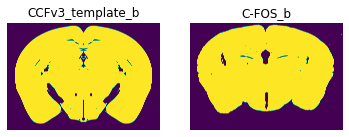

In [4]:
#convert CCFv3 template and C-FOS image into binary masks by scikit-image Li thresholding
#https://scikit-image.org/docs/stable/auto_examples/developers/plot_threshold_li.html

template = imread ("./image_registration_demo/ref0607.tif")
C_FOS = imread ("./image_registration_demo/cfos0044.tif")

template_thr = threshold_li(template)
template_b = img_as_ubyte(template>template_thr)
imsave("./image_registration_demo/ref_b0607.tif", template_b)

C_FOS_thr = threshold_li(C_FOS)
C_FOS_b = img_as_ubyte(C_FOS>C_FOS_thr)
imsave("./image_registration_demo/cfos_b0044.tif", C_FOS_b)

plt.subplot(1,2,1)
plt.imshow(template_b)
plt.title("CCFv3_template_b")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(C_FOS_b)
plt.title("C-FOS_b")
plt.axis('off')

In [ ]:
#Image registration by 12 global and 1 local transform parameters
#modify parameters 
#reference: https://simpleelastix.readthedocs.io/ParameterMaps.html

#create transform_map folder
transform_map_path = "./image_registration_demo/transform_map"
if not os.path.exists(transform_map_path):
    os.makedirs(transform_map_path)

#registration
fixedImage = sitk.ReadImage("./image_registration_demo/ref_b0607.tif")
movingImage = sitk.ReadImage("./image_registration_demo/cfos_b0044.tif")

parameterMapVector = sitk.GetDefaultParameterMap('affine')
parameterMapVector2 =sitk.GetDefaultParameterMap('translation')
parameterMapVector3 = sitk.GetDefaultParameterMap('bspline')

parameterMapVector2['MaximumNumberOfIterations'] = ['8192']
parameterMapVector2['NumberOfResolutions'] = ['5']
parameterMapVector2['FixedImagePyramidSchedule']=['16','16','8','8','4','4','2','2','1','1']
parameterMapVector2['MovingImagePyramidSchedule']=['16','16','8','8','4','4','2','2','1','1']
parameterMapVector2['FinalBSplineInterpolationOrder'] = ['2']
parameterMapVector2['Interpolator'] = ['NearestNeighborInterpolator']
parameterMapVector2['FinalGridSpacingInPhysicalUnits'] = ['80']

parameterMapVector['MaximumNumberOfIterations'] = ['8192']
parameterMapVector2['NumberOfResolutions'] = ['5']
parameterMapVector['FixedImagePyramidSchedule']=['16','16','8','8','4','4','2','2','1','1']
parameterMapVector['MovingImagePyramidSchedule']=['16','16','8','8','4','4','2','2','1','1']
parameterMapVector['FinalBSplineInterpolationOrder'] = ['2']
parameterMapVector['Interpolator'] = ['NearestNeighborInterpolator']
parameterMapVector['FinalGridSpacingInPhysicalUnits'] = ['80']

parameterMapVector3['MaximumNumberOfIterations'] = ['5000']
parameterMapVector2['NumberOfResolutions'] = ['2']
parameterMapVector3['FixedImagePyramidSchedule']=['2','1']
parameterMapVector3['MovingImagePyramidSchedule']=['2','1']
parameterMapVector3['FinalBSplineInterpolationOrder'] = ['2']
parameterMapVector3['Interpolator'] = ['NearestNeighborInterpolator']
parameterMapVector3['FinalGridSpacingInPhysicalUnits'] = ['80']

elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetParameterMap(parameterMapVector2)
elastixImageFilter.AddParameterMap(parameterMapVector)
elastixImageFilter.AddParameterMap(parameterMapVector2) 
elastixImageFilter.AddParameterMap(parameterMapVector)
elastixImageFilter.AddParameterMap(parameterMapVector2)
elastixImageFilter.AddParameterMap(parameterMapVector)
elastixImageFilter.AddParameterMap(parameterMapVector2)
elastixImageFilter.AddParameterMap(parameterMapVector)
elastixImageFilter.AddParameterMap(parameterMapVector)
elastixImageFilter.AddParameterMap(parameterMapVector)
elastixImageFilter.AddParameterMap(parameterMapVector)
elastixImageFilter.AddParameterMap(parameterMapVector)
elastixImageFilter.AddParameterMap(parameterMapVector3)

#elastixImageFilter.PrintParameterMap()

elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)

elastixImageFilter.Execute()
transformParameterMap = elastixImageFilter.GetTransformParameterMap()
#sitk.PrintParameterMap(transformParameterMap)

#save transformparameters
for i in np.arange(13):
    sitk.WriteParameterFile (transformParameterMap[i], "./image_registration_demo/transform_map/transformparameter" +str(i)+".txt")

In [5]:
#plot registration result
resImg = elastixImageFilter.GetResultImage()
resImg_np = sitk.GetArrayFromImage(resImg)
resImg8bit = resImg_np.astype ("uint8")

plt.subplot (1,2,1)
merage_ori = np.dstack (((sitk.GetArrayFromImage(movingImage)).astype ("uint8"),(sitk.GetArrayFromImage(fixedImage)).astype ("uint8"),np.zeros_like (resImg8bit)))
plt.imshow (merage_ori)
plt.title ("Red:C-FOS_b; \nGreen:CCFv3_template_b")
plt.axis('off')

plt.subplot (1,2,2)
merage = np.dstack ((resImg8bit,(sitk.GetArrayFromImage(fixedImage)).astype ("uint8"), np.zeros_like (resImg8bit))) 
plt.imshow (merage)
plt.title ("Red:C-FOS_b_T; \nGreen:CCFv3_template_b_T")
plt.axis('off')
plt.tight_layout()
plt.show()

NameError: name 'elastixImageFilter' is not defined

In [ ]:
#apply multiple transform parameters to another channel

transformParameterMap_0 = sitk.ReadParameterFile ("./image_registration_demo/transform_map/transformparameter0.txt")
transformParameterMap_1 = sitk.ReadParameterFile ("./image_registration_demo/transform_map/transformparameter1.txt")
transformParameterMap_2 = sitk.ReadParameterFile ("./image_registration_demo/transform_map/transformparameter2.txt")
transformParameterMap_3 = sitk.ReadParameterFile ("./image_registration_demo/transform_map/transformparameter3.txt")
transformParameterMap_4 = sitk.ReadParameterFile ("./image_registration_demo/transform_map/transformparameter4.txt")
transformParameterMap_5 = sitk.ReadParameterFile ("./image_registration_demo/transform_map/transformparameter5.txt")
transformParameterMap_6 = sitk.ReadParameterFile ("./image_registration_demo/transform_map/transformparameter6.txt")
transformParameterMap_7 = sitk.ReadParameterFile ("./image_registration_demo/transform_map/transformparameter7.txt")
transformParameterMap_8 = sitk.ReadParameterFile ("./image_registration_demo/transform_map/transformparameter8.txt")
transformParameterMap_9 = sitk.ReadParameterFile ("./image_registration_demo/transform_map/transformparameter9.txt")
transformParameterMap_10 = sitk.ReadParameterFile ("./image_registration_demo/transform_map/transformparameter10.txt")
transformParameterMap_11 = sitk.ReadParameterFile ("./image_registration_demo/transform_map/transformparameter11.txt")
transformParameterMap_12 = sitk.ReadParameterFile ("./image_registration_demo/transform_map/transformparameter12.txt")

transformixImageFilter = sitk.TransformixImageFilter()
transformixImageFilter.SetTransformParameterMap (transformParameterMap_0)
transformixImageFilter.AddTransformParameterMap (transformParameterMap_1)
transformixImageFilter.AddTransformParameterMap (transformParameterMap_2)
transformixImageFilter.AddTransformParameterMap (transformParameterMap_3)
transformixImageFilter.AddTransformParameterMap (transformParameterMap_4)
transformixImageFilter.AddTransformParameterMap (transformParameterMap_5)
transformixImageFilter.AddTransformParameterMap (transformParameterMap_6)
transformixImageFilter.AddTransformParameterMap (transformParameterMap_7)
transformixImageFilter.AddTransformParameterMap (transformParameterMap_8)
transformixImageFilter.AddTransformParameterMap (transformParameterMap_9)
transformixImageFilter.AddTransformParameterMap (transformParameterMap_10)
transformixImageFilter.AddTransformParameterMap (transformParameterMap_11)
transformixImageFilter.AddTransformParameterMap (transformParameterMap_12)

oChIEF = sitk.ReadImage("./image_registration_demo/oChIEF0044.tif")
transformixImageFilter.SetMovingImage (oChIEF)
transformixImageFilter.Execute()

oChIEF_T = transformixImageFilter.GetResultImage()
oChIEF_T_img = sitk.GetArrayFromImage(oChIEF_T)

plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(oChIEF), vmax = 5000)
plt.title("oChIEF_img")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(oChIEF_T_img, vmax = 5000)
plt.title("oChIEF_img_T")
plt.axis('off')